# 13 Визуализация данных
## 13.3 Знакомство с новыми данными


In [1]:
import pandas as pd


In [2]:
covid = pd.read_csv('data/covid_data.csv')
display(covid.head(5))

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [3]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42795 entries, 0 to 42794
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              42795 non-null  object 
 1   date                                 42795 non-null  object 
 2   total_vaccinations                   23457 non-null  float64
 3   people_vaccinated                    22371 non-null  float64
 4   people_vaccinated_per_hundred        22371 non-null  float64
 5   people_fully_vaccinated              19462 non-null  float64
 6   people_fully_vaccinated_per_hundred  19462 non-null  float64
 7   daily_vaccinations                   42558 non-null  float64
 8   vaccines                             42795 non-null  object 
dtypes: float64(6), object(3)
memory usage: 2.9+ MB


None

In [4]:
covid = covid.groupby(
    ['date', 'country'],
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

In [5]:
covid['date'] = pd.to_datetime(covid['date'])

In [6]:
covid['active']= covid['confirmed'] - covid['deaths'] - covid['recovered']

In [7]:
covid = covid.sort_values(['country', 'date'])
covid['daily_confirmed'] = covid.groupby('country')['confirmed'].diff()
covid['daily_deaths'] = covid.groupby('country')['deaths'].diff()
covid['daily_recovered'] = covid.groupby('country')['recovered'].diff()
display(covid)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15933,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17290,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [9]:
vaccinations_data['date'].describe()

C:\Users\Павел\AppData\Local\Temp\ipykernel_4584\2727065807.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  vaccinations_data['date'].describe()


count                   42795
unique                    279
top       2021-06-30 00:00:00
freq                      216
first     2020-12-02 00:00:00
last      2021-09-06 00:00:00
Name: date, dtype: object

In [10]:
covid_df = covid.merge(vaccinations_data, on=['country', 'date'],how='left')
print(covid_df.shape[1])
print(covid_df.shape[0])

16
86785


In [11]:
covid_df['death_rate'] = covid_df['deaths']/covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered']/covid_df['confirmed'] * 100

In [12]:
round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)

67.06

In [13]:
covid_df.head()


,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


## 13.4 Графические возможности *Pandas*


<AxesSubplot: title={'center': 'Ежедневная заболеваемость во времени'}, xlabel='date'>

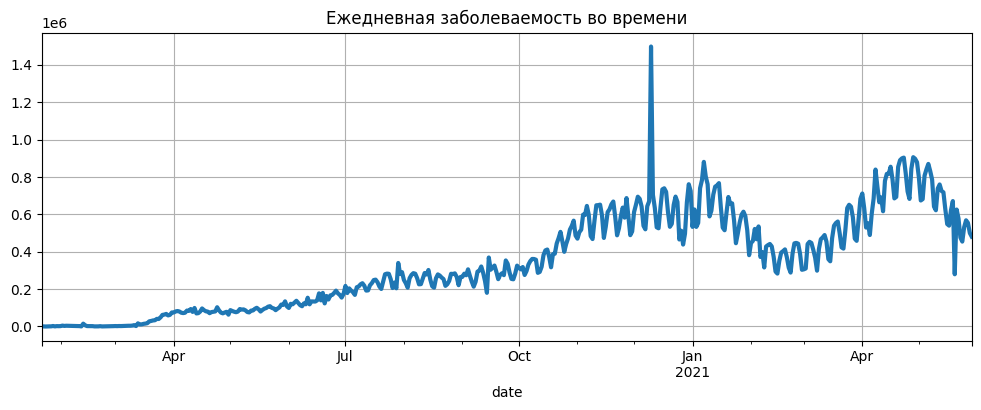

In [26]:
group_cases = covid_df.groupby('date')['daily_confirmed'].sum()
group_cases.plot(
    kind='line',
    figsize=(12,4),
    grid=True,
    title='Ежедневная заболеваемость во времени',
    lw=3
)


<AxesSubplot: title={'center': 'Распределение еждневной заболеваемости'}, ylabel='Frequency'>

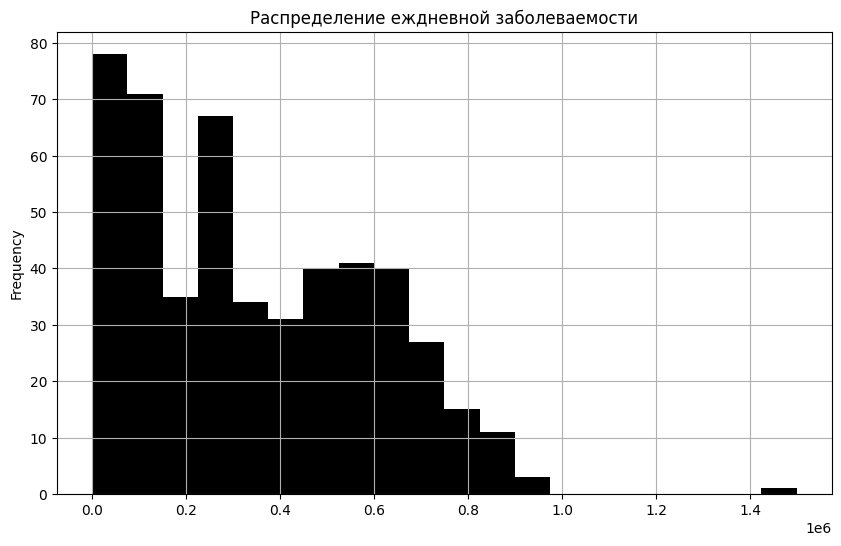

In [32]:
from turtle import color


group_cases.plot(
    kind='hist',
    figsize=(10,6),
    title='Распределение еждневной заболеваемости',
    grid=True,
    color='Black',
    bins=20
)

<AxesSubplot: xlabel='country'>

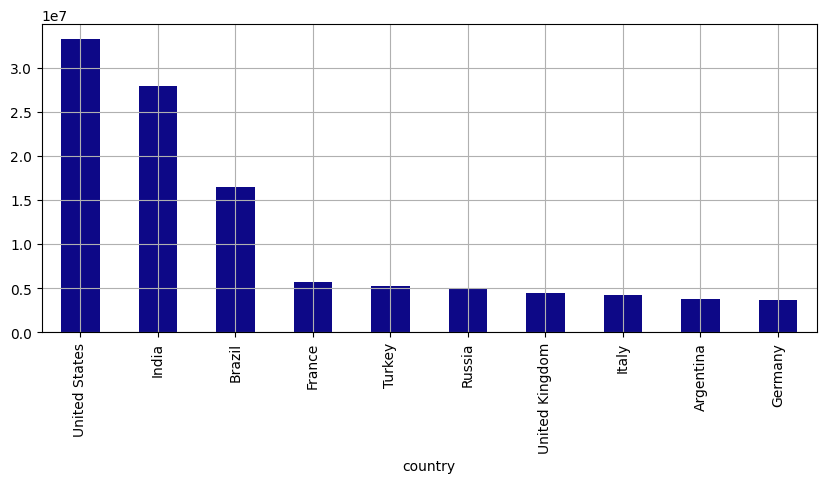

In [38]:
grouped_country = covid_df.groupby('country')['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(10,4),
    colormap='plasma'
)

<AxesSubplot: xlabel='country'>

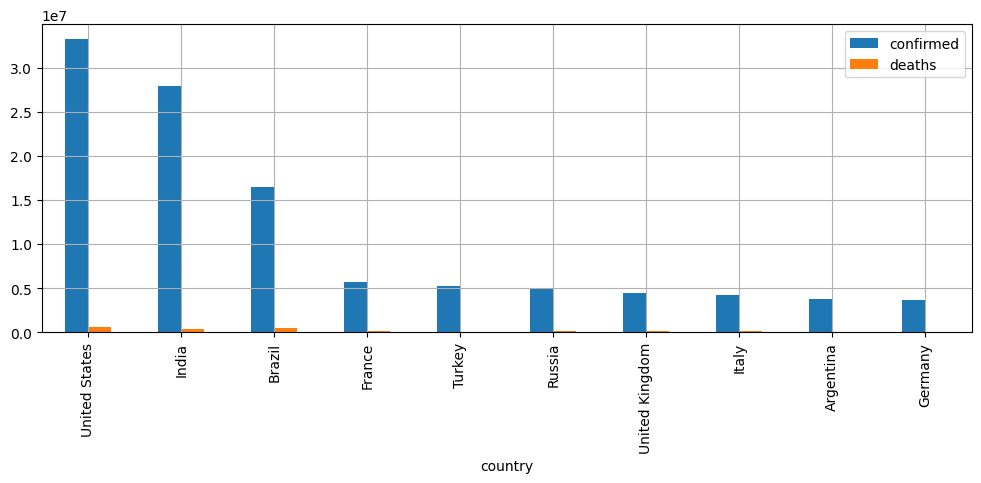

In [39]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
)

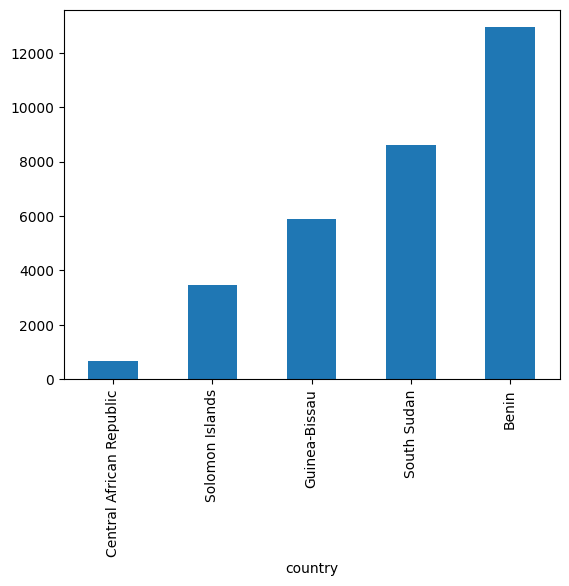

In [40]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');